In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier

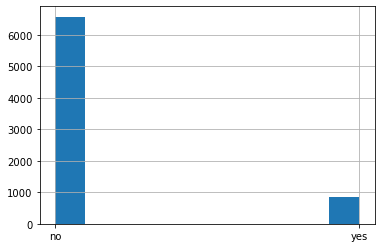

In [2]:
#read train and test datasets into pandas DataFrames trainx_df, trainy_df,testx_df

trainpath = "\\Users\\Reetika Siddantam\\Desktop\\Data-Science_2019501086\\Introduction to ML\\CodeCamp2\\marketing_training.csv"
testpath = "\\Users\\Reetika Siddantam\\Desktop\\Data-Science_2019501086\\Introduction to ML\\CodeCamp2\\marketing_test.csv"
trainx_df=pd.read_csv(trainpath)
trainy_df=trainx_df['responded']
trainy_df.hist()
trainx_df.drop('responded',axis=1,inplace=True)
testx_df=pd.read_csv(testpath)

In [3]:
# As a first step of pre-processing remove columns with null value ratio greater than provided limit

sample_size=len(trainx_df)
columns_with_null_values=[[col,float(trainx_df[col].isnull().sum())/float(sample_size)] for col in trainx_df.columns if trainx_df[col].isnull().sum()]
columns_to_drop=[x for (x,y) in columns_with_null_values if y>0.3]
trainx_df.drop(columns_to_drop,axis=1,inplace=True)
testx_df.drop(columns_to_drop,axis=1,inplace=True)

In [4]:
# As a second pre-processing step find all categorical columns and one hot  encode them. Before one hot encode fill all null values with dummy in those columns.  Some categorical columns in trainx_df may not have null values in trainx_df but have null values in testx_df. To overcome this problem we will add a row to the trainx_df with all dummy values for categorical values. Once one hot encoding is complete drop the added dummy column
categorical_columns=[col for col in trainx_df.columns if trainx_df[col].dtype==object]
ordinal_columns=[col for col in trainx_df.columns if col not in categorical_columns]
dummy_row=list()
for col in trainx_df.columns:
    if col in categorical_columns:
        dummy_row.append("dummy")
    else:
        dummy_row.append("")
new_row=pd.DataFrame([dummy_row],columns=trainx_df.columns)
trainx_df=pd.concat([trainx_df,new_row],axis=0, ignore_index=True)
testx_df=pd.concat([testx_df],axis=0,ignore_index=True)
for col in categorical_columns:
    trainx_df[col].fillna(value="dummy",inplace=True)
    testx_df[col].fillna(value="dummy",inplace=True)
enc = OneHotEncoder(drop='first',sparse=False)
enc.fit(trainx_df[categorical_columns])
trainx_enc=pd.DataFrame(enc.transform(trainx_df[categorical_columns]))
testx_enc=pd.DataFrame(enc.transform(testx_df[categorical_columns]))
trainx_enc.columns=enc.get_feature_names(categorical_columns)
testx_enc.columns=enc.get_feature_names(categorical_columns)
trainx_df=pd.concat([trainx_df[ordinal_columns],trainx_enc],axis=1,ignore_index=True)
testx_df=pd.concat([testx_df[ordinal_columns],testx_enc],axis=1,ignore_index=True)
trainx_df.drop(trainx_df.tail(1).index,inplace=True)

In [5]:
# As a third step of pre-processing fill all missing values for ordinal features

imputer = KNNImputer(n_neighbors=2)
imputer.fit(trainx_df)
trainx_df_filled = imputer.transform(trainx_df)
trainx_df_filled=pd.DataFrame(trainx_df_filled,columns=trainx_df.columns)
testx_df_filled = imputer.transform(testx_df)
testx_df_filled=pd.DataFrame(testx_df_filled,columns=testx_df.columns)
testx_df_filled.reset_index(drop=True,inplace=True)

In [6]:
#Standared Scaling
scaler = preprocessing.StandardScaler().fit(trainx_df)
trainx_df=scaler.transform(trainx_df_filled)
testx_df=scaler.transform(testx_df_filled)

In [7]:
le = preprocessing.LabelEncoder()
trainy_df=le.fit_transform(trainy_df)
trainy_df

array([0, 0, 0, ..., 0, 0, 0])

np.cumsum(pca.explained_variance_ratio_) [0.10573054 0.15421457 0.1964839  0.23485664 0.27172348 0.30474827
 0.33574351 0.36511913 0.39299644 0.42004003 0.44588451 0.47077443
 0.49422077 0.51653999 0.53826713 0.5589633  0.57945235 0.59975684
 0.61991183 0.63993628 0.65948508 0.67772172 0.69590357 0.71360521
 0.73122755 0.74867707 0.76593274 0.78265413 0.79929006 0.81577266
 0.832035   0.84774842 0.8631978  0.87863195 0.89351909 0.90778753
 0.92093481 0.93390202 0.94649881 0.95718095 0.96508696 0.9715728
 0.9778881  0.98210357 0.98621132 0.98965611 0.99293736 0.9948809
 0.99665652 0.99788647 0.99891068 0.9998973  0.99996468 0.99999991
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


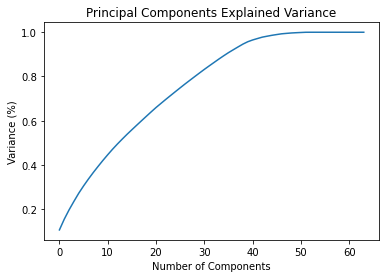

In [8]:
pca = PCA().fit(trainx_df)
itemindex = np.where(np.cumsum(pca.explained_variance_ratio_)>0.9999)
print('np.cumsum(pca.explained_variance_ratio_)',      np.cumsum(pca.explained_variance_ratio_))
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(np.cumsum(pca.explained_variance_ratio_)[0])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Principal Components Explained Variance')
plt.show()
pca_std = PCA(n_components=itemindex[0][0]).fit(trainx_df)
trainx_df = pca_std.transform(trainx_df)
testx_df = pca_std.transform(testx_df)

In [9]:
 X_train, X_test, y_train, y_test = train_test_split(trainx_df, trainy_df, test_size=0.3, random_state=42)

In [10]:
logreg=LogisticRegression(class_weight="balanced",C=0.00001,max_iter=1000000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1e-05, class_weight='balanced', max_iter=1000000)

In [11]:
svcmodel=SVC(C= 1.0,degree=3,kernel='rbf')
svcmodel.fit(X_train, y_train)

SVC()

In [12]:
nn_bp_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1,max_iter=1000)
nn_bp_model.fit(X_train, y_train)

C:\Users\Reetika Siddantam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), max_iter=1000,
              random_state=1, solver='lbfgs')

0.7388725331431296
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1942
           1       0.57      0.17      0.26       283

    accuracy                           0.88      2225
   macro avg       0.73      0.58      0.60      2225
weighted avg       0.85      0.88      0.85      2225

0.5714285714285714 0.1696113074204947


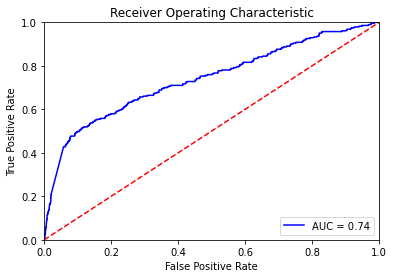

In [13]:
model = nn_bp_model
yprobs= model.predict_log_proba(X_test)
yprobs=yprobs[:,1]
ras=roc_auc_score(y_test,yprobs,average = 'weighted')
print(ras)
yhat = model.predict(X_test)

#pd.DataFrame(yhat).to_csv(model)
TP, TN, FP, FN =0,0,0,0
for i in range(len(yhat)):
    if yhat[i]==0:
        if y_test[i]==0:
            TN+=1
        else:
            FN+=1
    else:
        if y_test[i]==1:
            TP+=1
        else:
            FP+=1
print(classification_report(y_test,yhat))
print(classification_report(y_test,yhat,output_dict=True)['1']['precision'], classification_report(y_test,yhat,output_dict=True)['1']['recall'])
fpr, tpr, threshold = roc_curve(y_test, yprobs)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()